In [20]:
import scipy as sp
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.io as sio
from scipy.interpolate import interp1d
import math
from scipy import stats
import glob
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC # "Support Vector Classifier" 
import shutil
import os
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 4),
         'axes.labelsize': 'large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [21]:
from constant_variables import *

In [22]:
# PATHS
datapath = 'E:\\two_boundary\\original_data\\'
figpath = 'E:\\two_boundary\\figures\\'
datapathsave = 'E:\\two_boundary\\data\\'

brain_areas = ['MT', 'MST']

monkey = 'Neville'

In [23]:
all_coords = {}

for area in brain_areas[0:2]: 
    currpath = datapathsave + monkey + '\\' + area + '\\good_neurons\\task_responsive\\'

    os.chdir(currpath)
    filelist = [f for f in glob.glob("*.mat")]
    n_files = len(filelist)
    
    all_coords[area] = [[] for i in range(n_files)]

    for i, file in enumerate(filelist):
        data = sio.loadmat(file)['coords'].flatten()
        all_coords[area][i] = data

In [24]:
sp.io.savemat('E:\\two_boundary\\Neville_coords.mat',  {'all_coords': all_coords})

<IPython.core.display.Javascript object>


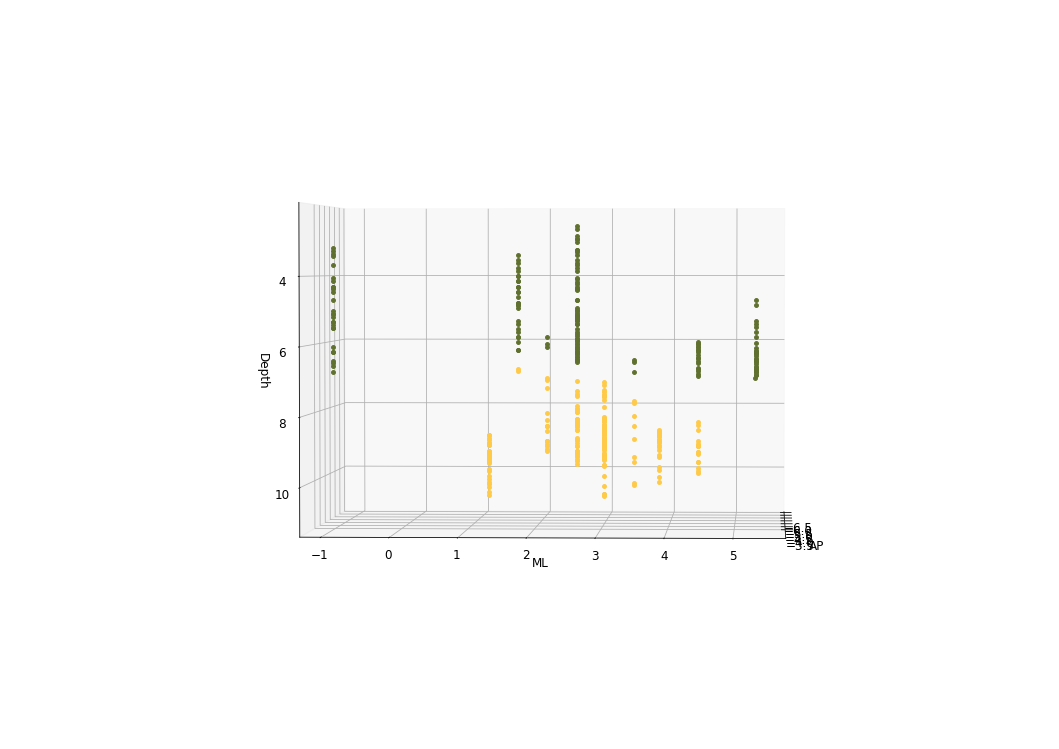

In [6]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for area in brain_areas:
    
    
    for coords in all_coords[area]:
        ax.scatter(coords[0], coords[1], coords[2],  s = 15, c = plot_colors[area], marker = 'o')
    #ax.legend(frameon = False, fontsize = 15)

    ax.invert_zaxis()
    ax.invert_xaxis()

    ax.set_xlabel('AP')
    ax.set_ylabel('ML')
    ax.set_zlabel('Depth')

    #ax.set_xlim(-4, 2)
    #ax.set_ylim(2, 7)
    #ax.set_zlim(5, 20)

    plt.show()

# Neville

In [12]:
depth = [13, 16.6, 18.8, 17.2, 17.5, 17.4, 17.7, 19.2, 21.2, 19.9, 21.4, 16.85, 18.6, 19.5, 21.2, 21.7]
ap = [0.5, 0.5, -0.5, -1.5 ,0.5, -0.5, -1.5, -1.5, -2.5, -1.5, -1.5, -1.5, -1.5, 0.5, 0.5, -2.5]
ml = [4.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 6.5, 6.5, 6.5]


depth_mst = [12.9, 10.4, 13.357, 9.1, 10.445, 9.5, 11, 11.925, 10, 12, 14, 10, 9.2, 9.92, 11.5, 9.45, 10.95, 10.8, 10.25, 12.4, 9.8, 11.3, 13, 11.7, 9.8, 11.3]
ap_mst = [1.5, 1.5, 1.5, 1.5, -0.5, -0.5, -1.5, -0.5, 0.5, 0.5, 1.5, 0.5, -0.5, -0.5, -0.5, 1.5, 1.5, 0.5, -0.5, -0.5, 1.5, 1.5, 1.5, -0.5, 1.5, 1.5]
ml_mst = [4.5, 3.5, 4.5, 3.5, 3.5, 2.5, 2.5, 4.5, 4.5, 4.5, 3.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5, 3.5, 3.5, 4.5, 4.5, 4.5, 3.5, 3.5, 3.5]

In [13]:
depth_mt = [np.arange(i-.14, i+.01, .01) for i in depth]
depth_mt = np.hstack(depth_mt)

ap_mt = [[i]*16 for i in ap]
ap_mt = np.hstack(ap_mt)

ml_mt = [[i]*16 for i in ml]
ml_mt = np.hstack(ml_mt)


<IPython.core.display.Javascript object>


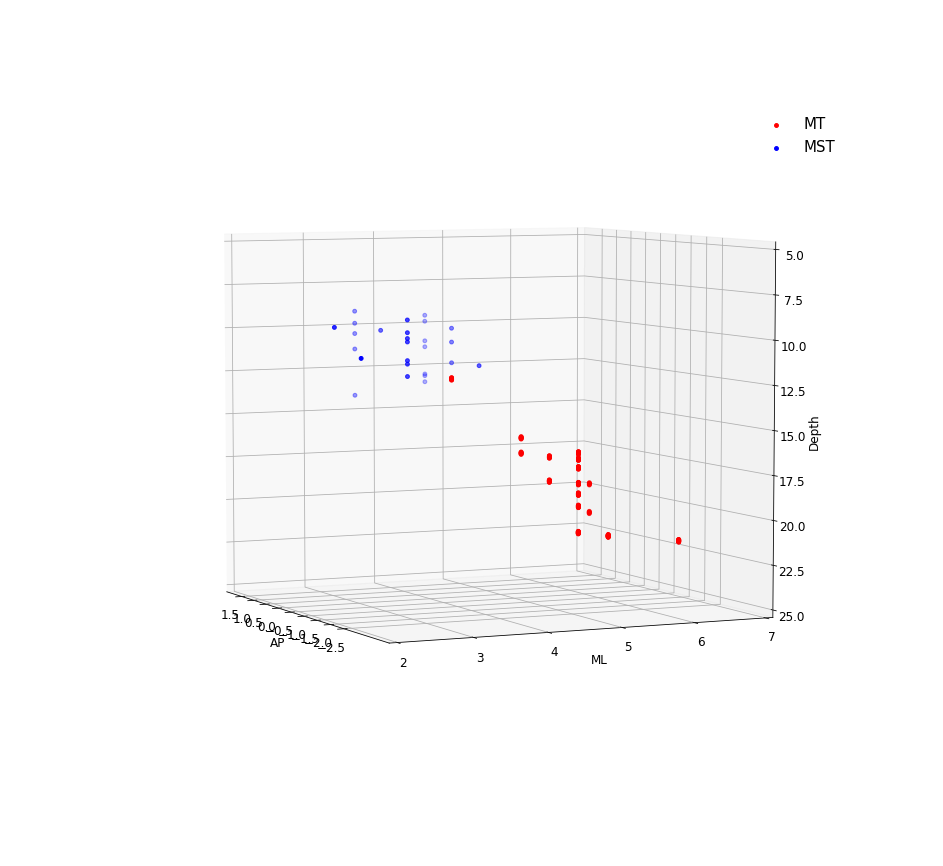

In [14]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(ap_mt, ml_mt, depth_mt, s=15, c='r', marker='o', label = 'MT')
ax.scatter(ap_mst, ml_mst, depth_mst, s=15, c='b', marker='o', label = 'MST')
ax.legend(frameon = False, fontsize = 15)

ax.invert_zaxis()
ax.invert_xaxis()

ax.set_xlabel('AP')
ax.set_ylabel('ML')
ax.set_zlabel('Depth')

ax.set_xlim(-4, 2)
ax.set_ylim(2, 7)
ax.set_zlim(5, 25)

plt.show()

# Stanton

In [85]:
depth, anterior_poster, medial_lateral = {}, {}, {}

depth['MST'] = [6.9, 5.9, 7.6, 7.66, 5, 6.8, 4, 5.8, 6.4, 5.1, 7.4, 8, 6.5, 8.3, 7.7, 8, 9.8]
anterior_poster['MST'] = [-3.95, -4.46, -4.46, -5.32, -2.40, -2.40, -4.46, -4.46, -4.46, -3.95, -5.32, -3.78, -3.78, -3.78, -3.26, -3.26, -3.26]
medial_lateral['MST'] = [1.712490634, 2.56965797, 2.56965797, 2.054619953, -0.8590113734, -0.8590113734, 2.56965797, 2.56965797, 2.56965797, 1.712490634, 2.054619953, 5.314068674, 5.314068674, 5.314068674, 4.456901339, 4.456901339, 4.456901339]

depth['MT'] = [10.6, 10.6, 10, 9.5, 10.8, 9, 9.7, 10.33, 8.33]
anterior_poster['MT'] = [-4.802718733, -6.347832783, -5.832794766, -4.97562743, -5.832794766, -5.832794766, -4.460589414, -4.97562743, -4.97562743]
medial_lateral['MT'] = [1.197452617, 3.768954625, 2.911787289, 3.426825306, 2.911787289, 2.911787289, 2.56965797, 3.426825306, 3.426825306]

In [86]:
for area in ['MST', 'MT']:
             
    depth[area] = np.hstack([np.linspace(i-1.8, i, 24) for i in depth[area]])
    anterior_poster[area] = np.hstack([[i]*24 for i in anterior_poster[area]])
    medial_lateral[area] = np.hstack([[i]*24 for i in medial_lateral[area]])


<IPython.core.display.Javascript object>


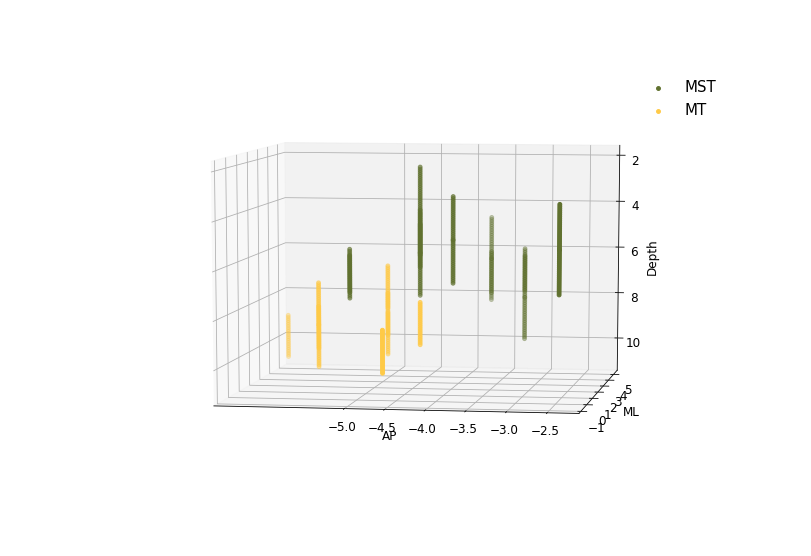

In [87]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for area in ['MST', 'MT']:

    ax.scatter(anterior_poster[area], medial_lateral[area], depth[area], s = 15, c = plot_colors[area], marker = 'o', label = area)
    ax.legend(frameon = False, fontsize = 15)

    ax.invert_zaxis()
    ax.invert_xaxis()

    ax.set_xlabel('AP')
    ax.set_ylabel('ML')
    ax.set_zlabel('Depth')

    #ax.set_xlim(-4, 2)
    #ax.set_ylim(2, 7)
    #ax.set_zlim(5, 20)

    plt.show()